In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
from scipy.stats import pearsonr
import pandas as pd
from scipy.stats import mannwhitneyu

[58.12172682 46.94121793 47.35914124 44.63515689 54.32703815 38.49230652
 58.72405882 46.1939655  51.59519548 48.75314812 57.31053969 39.69929645
 48.38791398 48.07972823 55.66884721 44.50054366 49.13785896 45.61070791
 50.21106873 52.91407607 44.49690411 55.72361855 54.5079536  52.51247169
 54.50427975 46.5813607  49.38554887 45.32115283 48.6605596  52.65177733
 46.54169624 48.01623237 46.5641365  45.77397179 46.64376935 49.93667701
 44.41344826 51.17207849 58.29901089 53.7102208  49.04082224 45.56185518
 46.26420853 58.46227301 50.25403877 46.81502177 50.95457742 60.50127568
 50.60079476 53.08601555 51.5008516  48.23875077 44.28740901 48.25328639
 48.95552883 52.93311596 54.19491707 54.65551041 51.42793663 54.42570582
 46.2280103  56.26434078 52.5646491  48.50953582 52.44259073 49.62214143
 55.65814694 57.59908408 60.92787703 43.01751832 42.77943097 47.47767069
 50.80018535 54.38084461 51.57817474 39.88899392 48.46897994 54.13987321
 51.15047368 53.8100559  48.88835929 48.99620966 50

Correlation (0.2516503639725293, 6.568549850127703e-16):


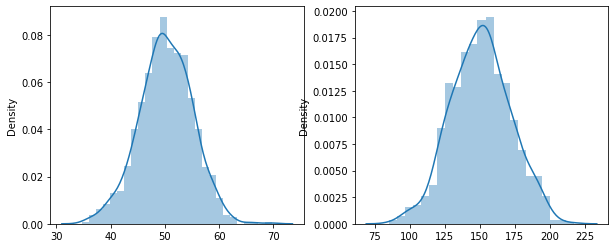

In [38]:
seed(1)

data = 5*randn(1000) + 50
data2 = data + (20*randn(1000) + 100)
print(data)
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(data)
print(np.mean(data))
print(np.std(data))

plt.subplot(1,2,2)
sns.distplot(data2)
print(np.mean(data2))
print(np.std(data2))
print("Correlation {}:".format(pearsonr(data,data2)))

# mean = 50 , std = 5

# Hypothesis Testing 
Note : Most popular is T-test

In [24]:
data = 5*randn(1000) + 50
data2 = 5*randn(1000) + 50.5
print(data.mean())
print(data2.mean())
from scipy.stats import ttest_ind
stat , p = ttest_ind(data , data2 , equal_var=False)
print("%.3f , %.3f"%(stat , p))

49.93518026019442
50.439655999692626
-2.260 , 0.024


In [25]:
alpha = 0.05
if p >= alpha:
    print("NUll is True")
else:
    print("NUll is rejected ( not same distribution)")

NUll is rejected ( not same distribution)


# Estimation statistics
1. Confidense Interval

In [1]:

from statsmodels.stats.proportion import proportion_confint
lower , upper = proportion_confint(90,100,0.05)
print("Lower = %.3f , Upper = %.3f"%(lower , upper))

#  The example above demonstrates this function in a hypothetical case where a model
#  made 90 correct predictions out of a dataset with 100 instances and we are interested in the
#  95% confidence interval (provided to the function as a significance of 0.05).
# It is actualy a lower n upper boud that how much the predictions fluctuates in real time if we have 90 out of 100 correct

Lower = 0.841 , Upper = 0.959


# Non-parametric Statistics

Note : Specially used in tests where Data is not Normally distributed

-0.0895775320235243 -0.028679997240434324
Statistics=311220.000, p=0.000
Different distribution (reject H0)


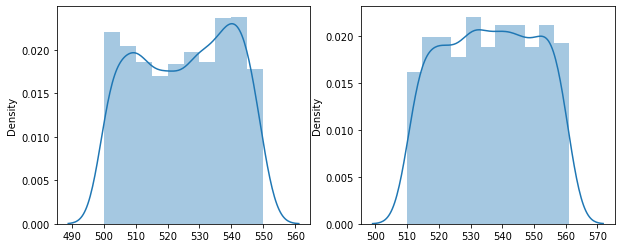

In [8]:
from numpy.random import rand
from scipy.stats import skew

data = 50*(rand(1000) + 10)
data2 = 51*(rand(1000) + 10)
plt.figure(figsize = (10,4))
seed(1)
plt.subplot(1,2,1)
sns.distplot(data)
plt.subplot(1,2,2)
sns.distplot(data2)
print(skew(data) , skew(data2))
stat, p = mannwhitneyu(data, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


In [19]:
from scipy.stats import rankdata
data = np.array([15,15,35,45,25,25,22,54,67])
data = rankdata(data, method = 'dense')
print(data)

[1 1 4 5 3 3 2 6 7]
